In [1]:
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
import LeeExperimentToolkit as lee
import pandas as pd

In [2]:
X, y = load_diabetes(return_X_y=True,as_frame=True)

this dataset only has 1023(10 features) different feature subset, so we can basiclly train them all

In [3]:
X_feaset,y_feaset = lee.PerformanceHandler.Sampling_randomd_featuresets(X,y,KNeighborsRegressor(),'all',20)

In [4]:
y_feaset.value_counts()

 6    203
 4    190
 7    175
 5    174
 3     92
 1     63
 0     41
 2     33
 8     31
-2      9
-3      5
-1      4
-4      3
Name: 11, dtype: int64

Now we have all the possibilities of combination,let's see how many feature they use and thier performance

In [5]:
list_sum = lee.PerformanceHandler.Sum_feature_amount(X_feaset)

In [6]:
len(list_sum)

1023

In [7]:
import matplotlib.pylab as plt

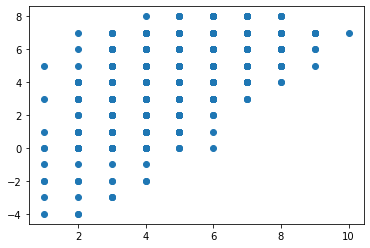

In [8]:
plt.scatter(list_sum,y_feaset)

let's change a larger dataset and see how feature_size influnce the model performance 

In [9]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

In [10]:
X_wine, y_wine = load_wine(return_X_y=True, as_frame=True)

In [11]:
X_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
len(X_wine.columns)

13

In [13]:
2**13

8192

this dataset contain 13 features and all subset would reach an amount of 8191 which is too large to train all of them, so we do a sampling of all feature set and see what happen

In [14]:
X_feaset_wine, y_feaset_wine = lee.PerformanceHandler.Sampling_randomd_featuresets(X_wine,y_wine,DecisionTreeClassifier(),1500,20)

In [15]:
len(X_feaset_wine)

1384

In [16]:
y_feaset_wine.value_counts()

17    693
18    314
16    143
15     89
14     44
12     32
13     30
19     16
11     11
10      9
9       2
7       1
Name: 14, dtype: int64

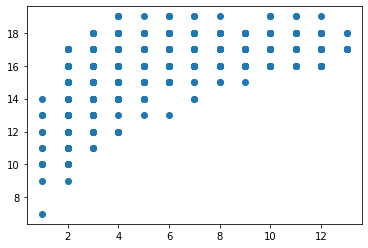

In [17]:
plt.scatter(lee.PerformanceHandler.Sum_feature_amount(X_feaset_wine),y_feaset_wine)